In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry.polygon import LinearRing
from shapely.geometry import box, Polygon
import time
import shapely.wkt
import matplotlib.pyplot as plt

In [3]:
# Load neccessary datasets
vierkant = gpd.read_file("../Data/NLvierkant/NL_vierkant100m.shp")
df = pd.read_csv("woonplaats_grenzen.csv" , sep = ";")

KeyboardInterrupt: 

In [ ]:
class city_grid():
    def __init__(self, city_borders, grid, city):
        
        # Select only the city_borders of wanted city and transform geometry (string) to geometry object
        self.city_borders = city_borders[city_borders.woonplaats.str.contains(city)]
        self.city_borders.geometry = self.city_borders.geometry.apply(shapely.wkt.loads)
        
        self.grid = grid
        self.city = city
        self.union = LinearRing()
    
    def border_fix(self, name):
        """
        TODO: Delete specific border if neccessary. (nieuw_amsterdam for example)
        """
        
        pass
    
    def create_union(self):
        for _, i in self.city_borders.iterrows():
            if not i.geometry.is_empty:
                x, y = i.geometry.xy
                self.union = self.union.union(i.geometry)
                plt.plot(x, y)
        plt.show()
        
    def save_grid(self):

        def create_box(bounds, distance):
            xmin, ymin, xmax, ymax = bounds
            xmin -= distance
            ymin -= distance
            xmax += distance
            ymax += distance

            return xmin, ymin, xmax, ymax


        boundbox = box(*create_box(self.union.bounds, 100))
        
        df = gpd.GeoDataFrame()
        tot = len(self.grid)
        for i, v in self.grid.iterrows():
            print("{0:.1f}%".format((i / tot) * 100), end = "\r")
            if boundbox.contains(v.geometry):
                df = df.append(v)
        
#         df.to_csv(self.city + "_grid.csv")

In [ ]:
cg = city_grid( df, vierkant, "Eindhoven")
cg.create_union()
cg.save_grid()

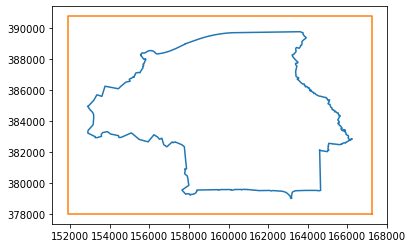

In [476]:
x, y = cg.geometry.xy
plt.plot(x, y)
xbox, ybox = box(*create_box(cg.geometry.bounds, 1000)).exterior.xy

plt.plot(xbox, ybox)

<AxesSubplot:>

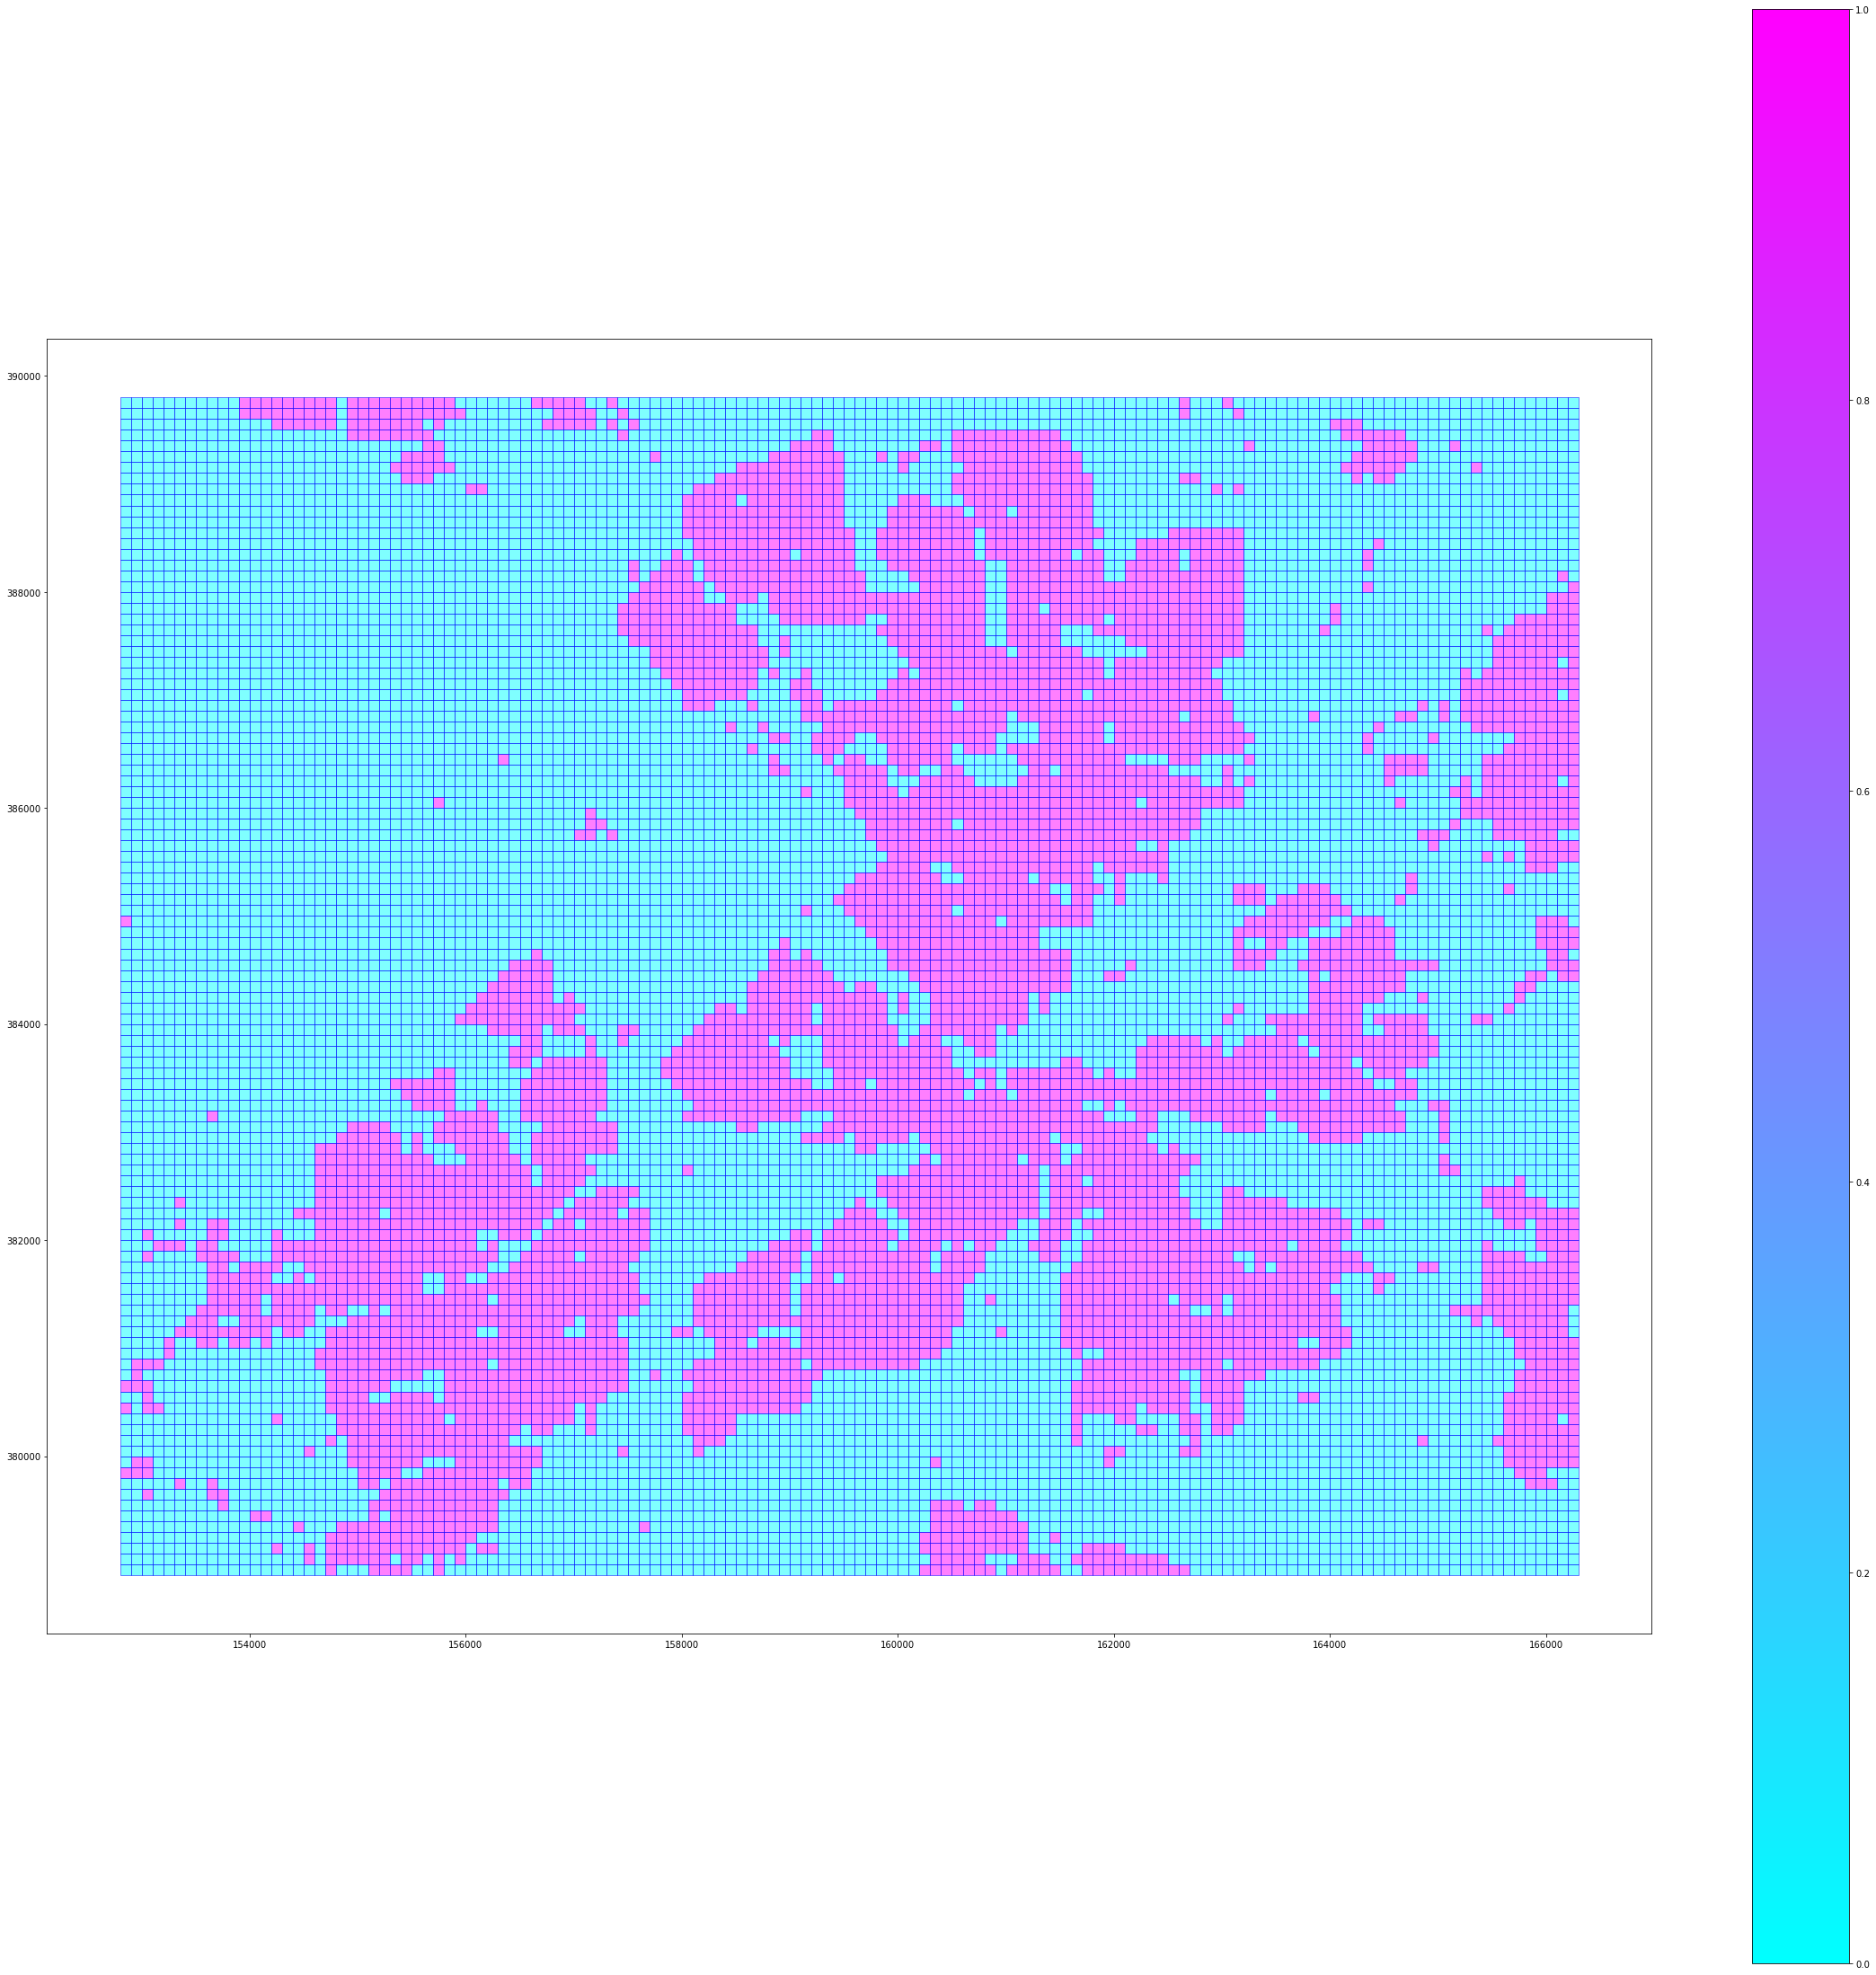

In [470]:
    cbs.set_index("c28992r100")
    samen = df.merge(cbs,how = "left")
    
    samen = samen[["geometry","C28992R100", "INWONER"]]
    samen["bewoond"] = samen.INWONER.notna()
    
    if print:
        samen.plot(figsize = (40,40), alpha=0.5, edgecolor = "b", column='bewoond',cmap='cool',legend=True)